In [1]:
import pandas as pd

df_ml = pd.read_csv('glassdoor_data_ML.csv')
df_swe = pd.read_csv('glassdoor_data_swe.csv', encoding='latin1')
df_swe = df_swe.drop(columns='Unnamed: 0')
df_ds = pd.read_csv('glassdoor_data_ds.csv')
df_ds = df_ds.drop(columns = 'Unnamed: 0')
df_pm = pd.read_csv('glassdoor_data_pm.csv')


FileNotFoundError: [Errno 2] File glassdoor_data_ML.csv does not exist: 'glassdoor_data_ML.csv'

In [27]:
df = pd.concat([df_ml, df_swe, df_ds, df_pm], ignore_index=True)
print(df.head())
print("# rows: ",len(df))

                                  title                company_name  rating  \
0                        Sales Engineer                      Xcalar     3.3   
1                     Big Data Engineer  Meridian Technologies, Inc     4.0   
2    Machine Learning Engineer (REMOTE)               Scalable Path     5.0   
3  Computational Science Engineer (CSE)                       Q Bio     4.4   
4   Software Engineer, Machine Learning                    Netskope     4.1   

           location estimate_salary_range estimate_salary_point  \
0      New York, NY           $98K-$118K               $107,133   
1       Seattle, WA           $85K-$114K                $97,989   
2     San Diego, CA                    -1                    -1   
3  Redwood City, CA           $72K-$106K                $89,277   
4   Santa Clara, CA          $160K-$178K               $166,979   

                                     job_description  \
0  Xcalar is pushing the limits of technology to ...   
1  We are 

In [28]:
# Salary parsing 
salary = df['estimate_salary_range'].apply(lambda x: x.replace('$',''))
salary = salary.apply(lambda x: x.replace('K','000'))
df['estimate_salary_range'] = salary

df['min_salary_estimate'] = salary.apply(lambda x: x.split('-')[0])
df['max_salary_estimate'] = salary.apply(lambda x: int(x.split('-')[1]))

df['estimate_salary_point'] = df['estimate_salary_point'].apply(lambda x: x.replace('$','').replace(',',''))

#df1['max_salary_estimate'] = df1.max_salary_estimate.apply(lambda x: -1 if '1' else df1.max_salary_estimate.values)
#df1['avg_salary_estimate'] = (df1.min_salary_estimate + df1.max_salary_estimate) / 2

In [31]:
# Parse job descriptions
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from unidecode import unidecode
import string

#nltk.download('all')

def pre_process(text):
    text = text.lower()
    stop_set = stopwords.words('english') + list(string.punctuation)
    text = " ".join( [i for i in word_tokenize(text) if i not in stop_set] )
    text = unidecode(text)
    return text

In [32]:
pre_process('TEXT iN noN ASCII: Ceñía. ?!*& lets ace this shit. i mean come on (cmon) bruh bro.~")')

"text non ascii cenia lets ace shit mean come cmon bruh bro.~ ''"

In [34]:
df['description_cleaned'] = df['job_description'].apply(lambda x: pre_process(str(x)) )
print(df.description_cleaned)

0       xcalar pushing limits technology help people d...
1       looking strong big data engineers data analyst...
2       scalable path looking machine learning enginee...
3       part team q work alongside highly skilled grou...
4       netskope today 's data users outside enterpris...
                              ...                        
2376    director product management corporate headquar...
2377    anticipate high volume great earning potential...
2378    godaddy godaddy powers world 's largest cloud ...
2379    company overviewlennox international lii leadi...
2380    technical account manager tam mathworks play k...
Name: description_cleaned, Length: 2381, dtype: object


In [35]:
df.to_csv('glassdoor_data_cleaned.csv', index=False)

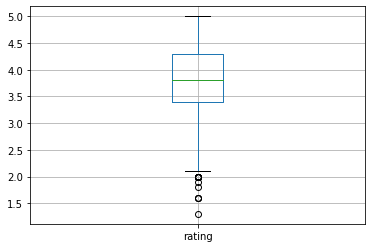

In [36]:
df.boxplot(column = 'rating')

In [37]:
df.columns

Index(['title', 'company_name', 'rating', 'location', 'estimate_salary_range',
       'estimate_salary_point', 'job_description', 'company_link',
       'min_salary_estimate', 'max_salary_estimate', 'description_cleaned'],
      dtype='object')

In [40]:
len(df.description_cleaned)

2381